In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates
%matplotlib inline
df = pd.read_csv('Energy_Dataset.csv')
df.Timestamp = pd.to_datetime(df.Timestamp)
temp = df.drop(labels=['Postcode','Customer', 'Solar_Production_kWh','Energy_Consumption_kWh','Heating_Consumption_kWh', 'Latitude','Longitude' ], axis = 1)
rel_df = temp.pivot_table(index='Timestamp',aggfunc='mean')
rel_df.rename(columns={'Price_AUD/MWh': 'Price_AUD_MWh'}, inplace=True)
rel_df

,Price_AUD_MWh,Total_Demand_MWh
Timestamp,,
2012-07-01 00:30:00,57.04,8097.93
2012-07-01 01:00:00,53.69,7852.57
2012-07-01 01:30:00,51.94,7632.28
2012-07-01 02:00:00,52.13,7384.70
2012-07-01 02:30:00,47.44,7112.43
...,...,...
2013-06-30 21:30:00,52.41,9049.13
2013-06-30 22:00:00,50.68,8761.76
2013-06-30 22:30:00,55.80,8620.94


In [2]:
rate='d'
demand_std = rel_df.Total_Demand_MWh.resample(rate).std()
price_std = rel_df.Price_AUD_MWh.resample(rate).std()


demand_mean = rel_df.Total_Demand_MWh.resample(rate).mean()
price_mean =  rel_df.Price_AUD_MWh.resample(rate).mean()


demand_CV = demand_std/demand_mean
price_CV = price_std/price_mean


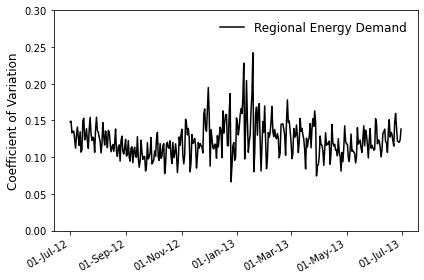

In [3]:
plt.plot(demand_CV, label='Regional Energy Demand',c='black')
plt.ylabel('Coefficient of Variation', fontsize=12)
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d-%b-%y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().set_ylim(0,.3)

plt.legend(loc=1, fontsize =12, frameon=False)

#plt.title('Daily Coefficent of variation')
plt.tight_layout()
plt.show()

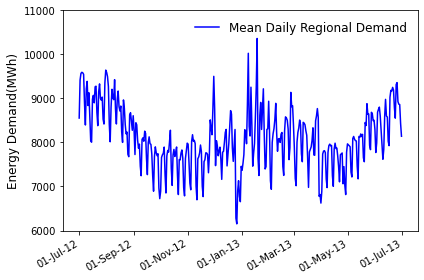

In [4]:
plt.plot(demand_mean, label='Mean Daily Regional Demand',c='b')
plt.ylabel('Energy Demand(MWh)', fontsize=12)
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d-%b-%y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().set_ylim(6000,11000)

plt.legend(loc=1, fontsize =12, frameon=False)

#plt.title('Daily Coefficent of variation')
plt.tight_layout()
plt.show()

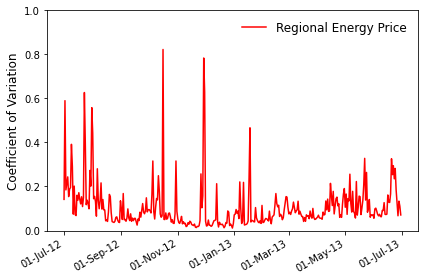

In [5]:
plt.plot(price_CV, label='Regional Energy Price',c='r')
plt.ylabel('Coefficient of Variation', fontsize=12)
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d-%b-%y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().set_ylim(0,1)

plt.legend(loc=1, fontsize =12, frameon=False)

#plt.title('Daily Coefficent of variation')
plt.tight_layout()
plt.show()

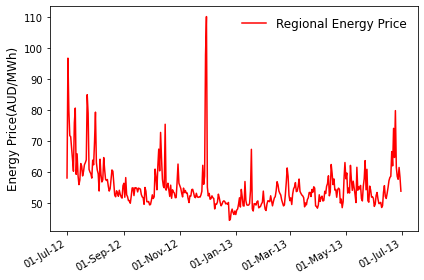

In [6]:
plt.plot(price_mean, label='Regional Energy Price',c='r')
plt.ylabel('Energy Price(AUD/MWh)', fontsize=12)
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d-%b-%y')
plt.gca().xaxis.set_major_formatter(date_format)
#plt.gca().set_ylim(0,1)

plt.legend(loc=1, fontsize =12, frameon=False)

#plt.title('Daily Coefficent of variation')
plt.tight_layout()
plt.show()